In [1]:
import tensorflow.keras as tf
import matplotlib.pyplot as plt
import numpy as np

In [2]:
mnist = tf.datasets.mnist
(x_train,y_train),(x_test,y_test) = mnist.load_data()

In [3]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


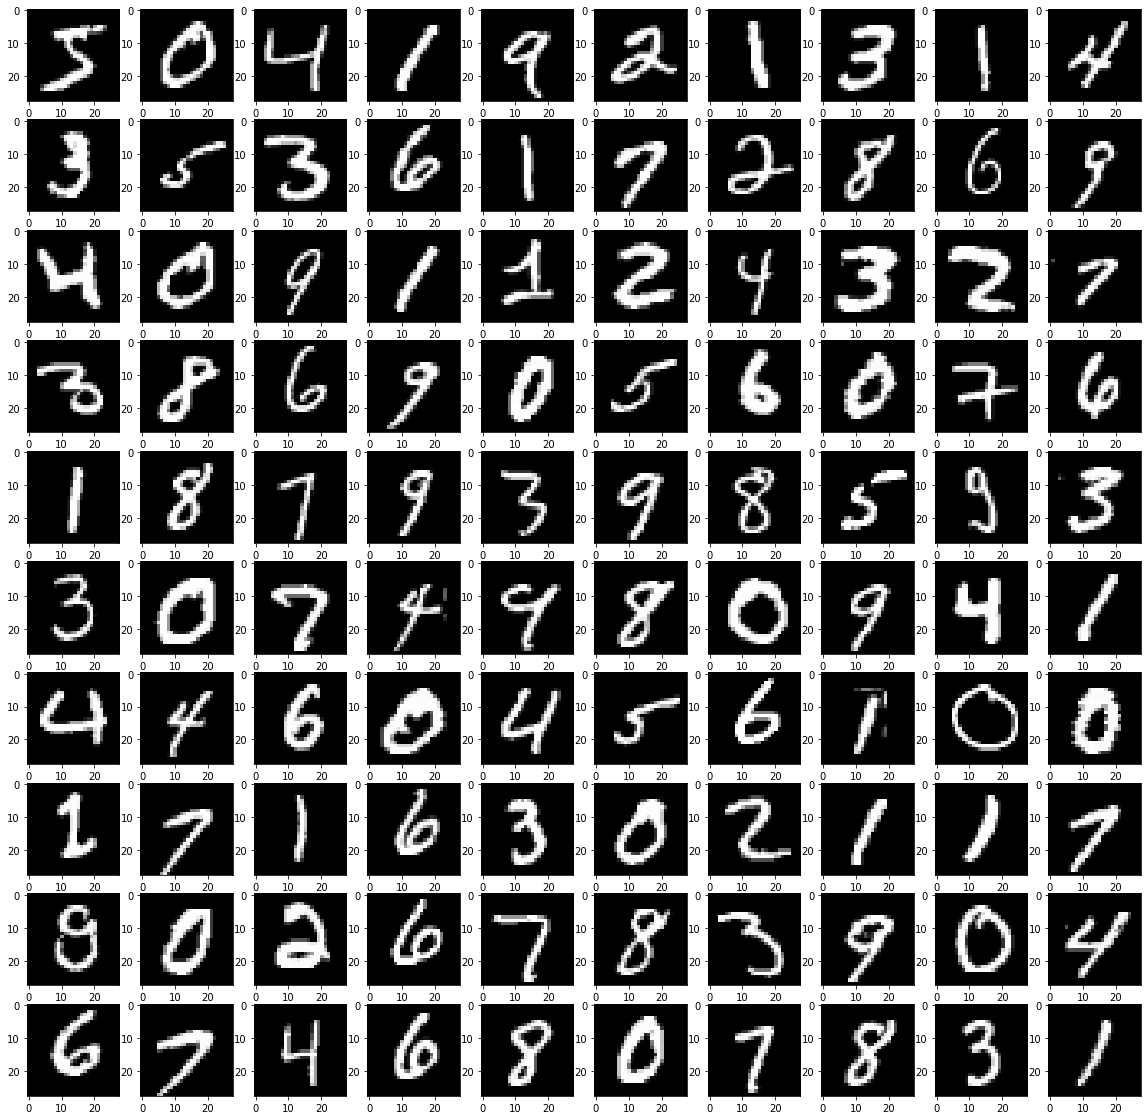

In [4]:
plt.figure(figsize=(20,20))
for i in range(100):
    plt.subplot(10,10,i+1)
    plt.imshow(x_train[i],cmap = 'gray')
plt.show()    

## Artifical Neural Network
## Bulid the model

In [5]:
model=tf.models.Sequential()
model.add(tf.layers.Flatten())
model.add(tf.layers.Dense(784,activation ='relu'))
model.add(tf.layers.Dense(10,activation = 'softmax'))
model.compile(optimizer = 'adam',loss='sparse_categorical_crossentropy',metrics = ['accuracy'])

In [6]:
x_train =x_train/255
x_test =x_test/255

In [7]:
model.fit(x_train,y_train,epochs=15,validation_data = (x_test,y_test))

Epoch 1/15
1875/1875 [==============================] - 18s 9ms/step - loss: 0.1897 - accuracy: 0.9437 - val_loss: 0.0931 - val_accuracy: 0.9712
Epoch 2/15
1875/1875 [==============================] - 16s 8ms/step - loss: 0.0759 - accuracy: 0.9765 - val_loss: 0.0733 - val_accuracy: 0.9771
Epoch 3/15
1875/1875 [==============================] - 16s 8ms/step - loss: 0.0487 - accuracy: 0.9845 - val_loss: 0.0663 - val_accuracy: 0.9802
Epoch 4/15
1875/1875 [==============================] - 16s 9ms/step - loss: 0.0355 - accuracy: 0.9888 - val_loss: 0.0573 - val_accuracy: 0.9816
Epoch 5/15
1875/1875 [==============================] - 16s 9ms/step - loss: 0.0267 - accuracy: 0.9914 - val_loss: 0.0754 - val_accuracy: 0.9786
Epoch 6/15
1875/1875 [==============================] - 16s 8ms/step - loss: 0.0199 - accuracy: 0.9932 - val_loss: 0.0831 - val_accuracy: 0.9785
Epoch 7/15
1875/1875 [==============================] - 16s 8ms/step - loss: 0.0176 - accuracy: 0.9941 - val_loss: 0.0750 - val_ac

In [8]:
ypred=model.predict(x_test)

In [9]:
y_test[19]

4

In [10]:
ypred[19].round()

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.], dtype=float32)

In [11]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.1224 - accuracy: 0.9790


[0.12242713570594788, 0.9789999723434448]

In [12]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [13]:
np.argmax(ypred,axis=1)

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [14]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,np.argmax(ypred,axis=1))

In [15]:
cm

array([[ 976,    1,    0,    1,    0,    0,    1,    1,    0,    0],
       [   1, 1126,    2,    0,    0,    0,    1,    2,    3,    0],
       [   7,    1, 1007,    6,    1,    0,    1,    3,    5,    1],
       [   0,    0,    0, 1002,    0,    0,    0,    3,    1,    4],
       [   2,    0,    1,    0,  956,    0,    6,    2,    0,   15],
       [   4,    0,    0,   41,    2,  837,    2,    0,    3,    3],
       [   4,    2,    0,    1,    2,    9,  938,    0,    1,    1],
       [   0,    0,    7,    2,    0,    1,    0, 1011,    2,    5],
       [   6,    0,    0,   15,    2,    1,    0,    1,  946,    3],
       [   2,    2,    0,    3,    5,    1,    0,    4,    1,  991]],
      dtype=int64)

In [16]:
from sklearn.metrics import accuracy_score

In [17]:
a = accuracy_score(y_test,np.argmax(ypred,axis=1))
a

0.979

In [18]:
model.trainable_weights[0]

<tf.Variable 'dense/kernel:0' shape=(784, 784) dtype=float32, numpy=
array([[ 0.03789282, -0.03335518, -0.05715389, ..., -0.00444009,
         0.0284598 , -0.04983535],
       [ 0.0511316 ,  0.03844217, -0.06094789, ..., -0.05699121,
         0.0438505 , -0.02130366],
       [ 0.02155183, -0.0322971 , -0.04851264, ..., -0.00992144,
        -0.01958386, -0.03127934],
       ...,
       [-0.03079932, -0.0048389 , -0.0282175 , ..., -0.00948258,
         0.02836976, -0.04684705],
       [ 0.0316057 ,  0.04551103, -0.00299084, ..., -0.05221136,
        -0.01089687,  0.01459435],
       [-0.02839142,  0.05796839,  0.05855739, ..., -0.01368823,
        -0.03921093, -0.03406444]], dtype=float32)>

In [19]:
model.trainable_weights[1]

<tf.Variable 'dense/bias:0' shape=(784,) dtype=float32, numpy=
array([ 7.22902790e-02, -8.53067450e-03, -1.15847103e-02,  4.13491614e-02,
       -1.67876497e-01, -3.68394703e-02,  5.29428124e-02, -1.42931575e-02,
        5.32487966e-02, -6.41822740e-02,  1.42212406e-01,  4.73398827e-02,
        5.51166311e-02, -5.71942590e-02,  6.19894825e-02, -1.29241683e-02,
        1.39206722e-01,  9.94529389e-03, -6.99353516e-02,  6.13570400e-02,
        9.70815495e-02, -4.81471531e-02,  2.26663593e-02,  4.35793325e-02,
        2.20655035e-02, -1.05623536e-01,  2.58743931e-02, -4.78377454e-02,
       -7.87298903e-02,  3.08648851e-02, -2.04196870e-01, -7.33712986e-02,
       -1.56705767e-01,  3.43130790e-02, -9.31931287e-03, -8.46639201e-02,
       -1.30304799e-03, -7.78625980e-02, -1.00563884e-01, -3.07185203e-02,
       -6.39934465e-02, -3.26514579e-02, -1.37946848e-02, -9.36712772e-02,
       -7.39728510e-02,  6.63972134e-03, -1.25845939e-01, -1.46451771e-01,
       -1.50865138e-01, -8.19668733e-

## Test a New sample

7


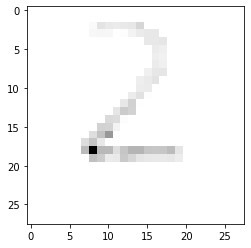

In [20]:
import cv2
img = cv2.imread('2.png',0)
img = img/255
img = cv2.resize(img,(28,28))
img = cv2.bitwise_not(img)
print(np.argmax(model.predict(np.array([img]))))
plt.imshow(img,cmap='gray')
plt.show()

7


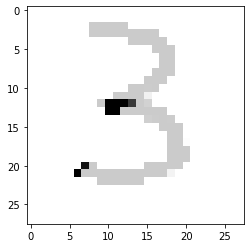

In [21]:
import cv2
img = cv2.imread('3.png',0)
img = img/255
img = cv2.resize(img,(28,28))
img = cv2.bitwise_not(img)
print(np.argmax(model.predict(np.array([img]))))
plt.imshow(img,cmap='gray')
plt.show()

## Save the model

In [22]:
model.save('mnist.h5')

## load the model

In [24]:
my_model = tf.models.load_model('mnist.h5')